In [21]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter 
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder,  LabelEncoder
from sklearn.model_selection import train_test_split


from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
df = pd.read_csv("masa_travel_insurance.csv")
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


### Correlation Matrix
#### - Pearson

However, I think Pearson should not be used because our data is definitely not normally distributed

In [22]:
df.corr(method = 'pearson')

,Duration,Net Sales,Commision (in value),Age
Duration,1.000000,0.429235,0.344772,0.002468
Net Sales,0.429235,1.000000,0.651315,0.037756
Commision (in value),0.344772,0.651315,1.000000,0.118348
Age,0.002468,0.037756,0.118348,1.000000


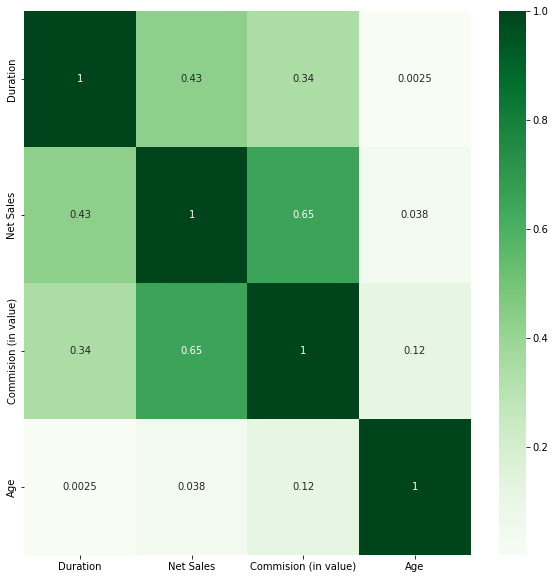

In [23]:
plt.figure(figsize=[10,10])
sns.heatmap(df.corr(method = 'pearson'), annot=True, cmap = "Greens")
plt.show()

#### - Kendall
I think Kendall or Spearman also can be used

In [24]:
df.corr(method = 'kendall')

,Duration,Net Sales,Commision (in value),Age
Duration,1.000000,0.199993,0.093736,-0.011277
Net Sales,0.199993,1.000000,0.260103,0.016856
Commision (in value),0.093736,0.260103,1.000000,0.115421
Age,-0.011277,0.016856,0.115421,1.000000


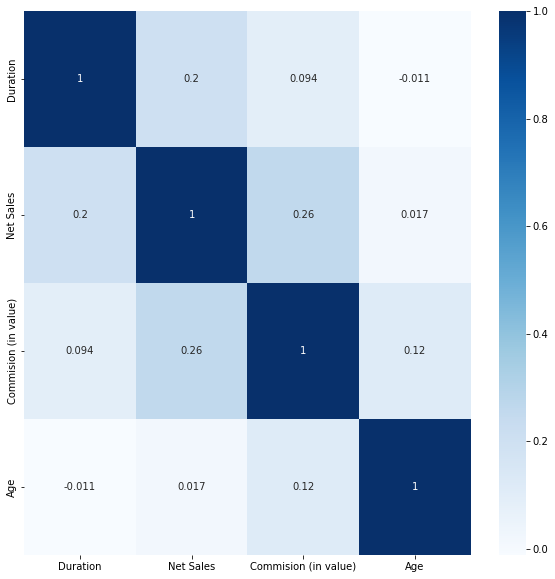

In [25]:
plt.figure(figsize=[10,10])
sns.heatmap(df.corr(method = 'kendall'), annot=True, cmap = "Blues")
plt.show()

#### - Spearman

In [26]:
df.corr(method = 'spearman')

,Duration,Net Sales,Commision (in value),Age
Duration,1.000000,0.282096,0.123518,-0.015910
Net Sales,0.282096,1.000000,0.303544,0.023497
Commision (in value),0.123518,0.303544,1.000000,0.146004
Age,-0.015910,0.023497,0.146004,1.000000


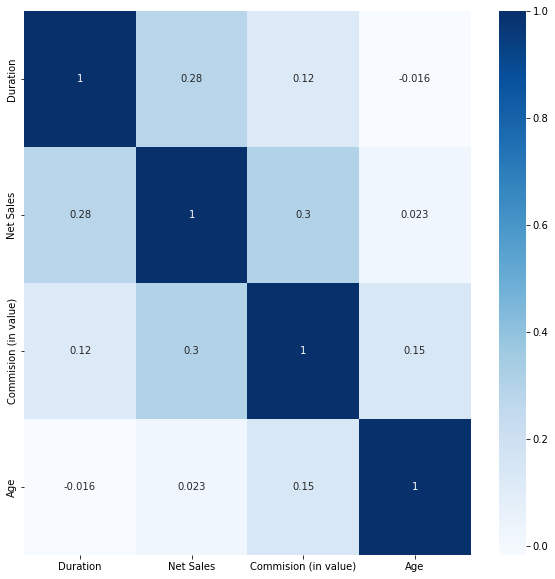

In [27]:
plt.figure(figsize=[10,10])
sns.heatmap(df.corr(method = 'spearman'), annot=True, cmap = "Blues")
plt.show()

In [28]:
df.describe()

,Duration,Net Sales,Commision (in value),Age
count,63326.000000,63326.000000,63326.000000,63326.000000
mean,49.317074,40.702018,9.809992,39.969981
std,101.791566,48.845637,19.804388,14.017010
min,-2.000000,-389.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.530000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


In [29]:
from scipy.stats import spearmanr
features = []
for item in df.columns:
    if df[item].dtype == "object":
        continue
    else:
        features.append(item)
        

for feature1 in features:
    for feature2 in features:
        coefficient, p = spearmanr(df[feature1].values, df[feature2].values)
        
        print(f"Coefficient of {feature1} and {feature2} is {coefficient} with p value of {round(p,4)}")

Coefficient of Duration and Duration is 0.9999999999999998 with p value of 0.0
Coefficient of Duration and Net Sales is 0.28209570660157546 with p value of 0.0
Coefficient of Duration and Commision (in value) is 0.12351803243758969 with p value of 0.0
Coefficient of Duration and Age is -0.015909913189712438 with p value of 0.0001
Coefficient of Net Sales and Duration is 0.2820957066015754 with p value of 0.0
Coefficient of Net Sales and Net Sales is 0.9999999999999998 with p value of 0.0
Coefficient of Net Sales and Commision (in value) is 0.30354371691361476 with p value of 0.0
Coefficient of Net Sales and Age is 0.023497226213689763 with p value of 0.0
Coefficient of Commision (in value) and Duration is 0.12351803243758969 with p value of 0.0
Coefficient of Commision (in value) and Net Sales is 0.30354371691361476 with p value of 0.0
Coefficient of Commision (in value) and Commision (in value) is 1.0 with p value of 0.0
Coefficient of Commision (in value) and Age is 0.146004392859066

### Mising Value Treatment

In [30]:
# Find out the sum of null data for each feature
df.isnull().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  45107
Age                         0
dtype: int64

In [31]:
# Find out the percentage of null data for each feature
df.isnull().sum()/len(df)*100

Agency                   0.000000
Agency Type              0.000000
Distribution Channel     0.000000
Product Name             0.000000
Claim                    0.000000
Duration                 0.000000
Destination              0.000000
Net Sales                0.000000
Commision (in value)     0.000000
Gender                  71.229827
Age                      0.000000
dtype: float64

In [32]:
df.drop("Gender", axis=1, inplace=True)


### Outlier Analysis and Treatment

In [33]:
# Removing negative net sales
df = df[df["Net Sales"] >= 0]
df = df[df["Duration"] >= 0]
df.to_csv("removed_negative")
df = pd.read_csv("removed_negative")


In [34]:
df

,Unnamed: 0,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
0,21,C2B,Airlines,Online,Bronze Plan,No,12,SINGAPORE,46.15,11.54,44
1,22,C2B,Airlines,Online,Bronze Plan,No,7,SINGAPORE,17.55,4.39,25
2,23,C2B,Airlines,Online,Bronze Plan,Yes,12,SINGAPORE,94.00,23.50,34
3,24,C2B,Airlines,Online,Silver Plan,No,190,SINGAPORE,294.75,73.69,26
4,25,C2B,Airlines,Online,Annual Silver Plan,No,364,SINGAPORE,389.00,97.25,30
...,...,...,...,...,...,...,...,...,...,...,...
62638,63321,JZI,Airlines,Online,Basic Plan,No,111,JAPAN,35.00,12.25,31
62639,63322,JZI,Airlines,Online,Basic Plan,No,58,CHINA,40.00,14.00,40
62640,63323,JZI,Airlines,Online,Basic Plan,No,2,MALAYSIA,18.00,6.30,57
62641,63324,JZI,Airlines,Online,Basic Plan,No,3,VIET NAM,18.00,6.30,63


In [35]:
df.describe()


,Unnamed: 0,Duration,Net Sales,Commision (in value),Age
count,62643.000000,62643.000000,62643.000000,62643.000000,62643.000000
mean,31621.479128,48.960921,41.803969,9.655532,39.957202
std,18294.901131,101.929382,47.635665,19.668634,13.984385
min,21.000000,0.000000,0.000000,0.000000,0.000000
25%,15753.500000,9.000000,18.000000,0.000000,35.000000
50%,31568.000000,22.000000,27.000000,0.000000,36.000000
75%,47498.500000,52.000000,49.000000,10.640000,43.000000
max,63325.000000,4881.000000,810.000000,283.500000,118.000000


In [36]:
from collections import Counter

def detect_outliers(df, feature):
        
    #1st quartile
    Q1 =  np.percentile(df[feature],25)
    #3rd quartile
    Q3 = np.percentile(df[feature],75)
    #IQR
    IQR = Q3 - Q1
    #outlier step
    outlier_step = IQR * 1.5
    #detect outlier and their indices
    upper_limit = Q3 + outlier_step
    lower_limit = Q1 - outlier_step
    outlier_list_col = df[(df[feature] > Q3 + outlier_step) | (df[feature] < Q1 - outlier_step)].index
    outlier_list_col = list(outlier_list_col)
    # number of rows with outliers
    len_outlier = ((df[feature] > Q3 + outlier_step) | (df[feature] < Q1 - outlier_step)).sum()
    print(f"{feature}:\nQ1: {Q1}\nQ3:{Q3}\nIQR: {IQR}\nUpper Limit: {upper_limit}\nLower Limit: {lower_limit}\nNumber of outlier rows: {len_outlier}\n")
    return outlier_list_col, upper_limit, lower_limit




In [37]:
features = ["Duration", "Net Sales", "Commision (in value)", "Age"]
outlier_id = []
upper_bounds = []
lower_bounds = []
for feature in features:
    outlier, upper_bound, lower_bound = detect_outliers(df, feature)
    outlier_id += outlier_id
    upper_bounds.append(upper_bound)
    lower_bounds.append(lower_bound)

id = np.unique(outlier_id)


Duration:
Q1: 9.0
Q3:52.0
IQR: 43.0
Upper Limit: 116.5
Lower Limit: -55.5
Number of outlier rows: 5612

Net Sales:
Q1: 18.0
Q3:49.0
IQR: 31.0
Upper Limit: 95.5
Lower Limit: -28.5
Number of outlier rows: 4886

Commision (in value):
Q1: 0.0
Q3:10.64
IQR: 10.64
Upper Limit: 26.6
Lower Limit: -15.96
Number of outlier rows: 6975

Age:
Q1: 35.0
Q3:43.0
IQR: 8.0
Upper Limit: 55.0
Lower Limit: 23.0
Number of outlier rows: 7311



In [38]:
# the reason of using loc is because the normal df[x][y] = mean | median will cause the df to retain a copy of original dataframe, hence the assignation of value is failed

for x in features:
    Q1 = df[x].quantile(0.25)
    Q3 = df[x].quantile(0.75)
    IQR = Q3 - Q1
    mean = df[x].mean()
    median = df[x].median()
    for k in range(len(df[x])):
        if ((df[x][k] < (Q1 - 1.5 * IQR)) | (df[x][k] > (Q3 + 1.5 * IQR))):
            df.loc[k, x] = median

In [39]:
# the reason of using loc is because the normal df[x][y] = mean | median will cause the df to retain a copy of original dataframe, hence the assignation of value is failed


for x in features:
    Q1 = df[x].quantile(0.25)
    Q3 = df[x].quantile(0.75)
    IQR = Q3 - Q1
    mean = df[x].mean()
    median = df[x].median()
    for k in range(len(df[x])):
        if ((df[x][k] < (Q1 - 1.5 * IQR)) | (df[x][k] > (Q3 + 1.5 * IQR))):
            df.loc[k, x] = median

df.to_csv("cleaned_data")
df.to_excel("cleaned")

In [40]:
for i in range(len(features)):
     upper = upper_bounds[i]
     lower = lower_bounds[i]
     len_outlier = ((df[features[i]] > upper) | (df[features[i]] < lower)).sum()
     print(f"Number of outlier rows: {len_outlier}\n")

    

Number of outlier rows: 0

Number of outlier rows: 0

Number of outlier rows: 0

Number of outlier rows: 0

